# Linear Regression From Scratch on Generated Data

Linear regression is a algorithm which is starting level algorithm for machine learning prediction. This code contains only about how we can genrate our own linear data with some noise and also to get a good output result out of it. The code is fully moduler so that to keep in mind about the use of the functions in other programs also.

## Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Functions use for Linear regression

### Generating Linear data with Some Noise

In [38]:
"""The function is use for the data generation it can produce linear data using linspace function of 
numpy library"""
def data_gen(n):
    x = np.linspace(0,1,n)
    y = 15*x+5+np.random.randn(len(x))
    plt.scatter(x,y)
    return x,y

### Prediction, Mean Square Error, Gradient and Line Functions

In [39]:
"""prediction function for predicting the result of the linear regression"""
def predict(theta0,theta,xi):
    
    #function returns the prediction value(RESULT)
    return theta0 + theta * xi

"""mean square error function shows the mean square error done by the gradient descent to lower down the 
error/loss in the learning and predicting of data"""
def sq_error(theta0,theta,xi,yi):
    
    #function returns the sum of mean square error
    return sum((yi-predict(theta0,theta,xi))**2)/n

"""gradient function is use to find the derivatives for the gradient descent algorithm"""
def gradients(theta0,theta,xi,yi):
    
    #derivaties of the gradient
    dj0=theta0+theta*xi-yi
    dj1=dj0@xi.T
    
    #function returns the list of gradient derivaties
    return [sum(dj0)/n,
            np.sum(dj1)/n]

"""line function to trace the line curve in the plot and to get the error/loss line which is y = m * x + c"""
def line(slope,intercept):
    axes = plt.gca()
    x = np.array(axes.get_xlim())
    
    #Line equation which is to be plot here intercept is the distance from the origin to the line on the y-axia
    #and slope is the angle of the line from the positive x-axis
    y = intercept + slope * x 
    
    #ploting the line
    plt.plot(x,y,'--r',linewidth = 2)

### Gradient Descent 

In [48]:
"""The Fit function is to fit the learning curve and reduce the loss of the model. The algorithm use here is
the Stocastic Gradient Descent(SGD). The algorithm is containing the learning rate,epsilon for the stoping of
under going algorithm to find global minima"""
def fit(x,y,alpha,epsilon):
    #Initializing variables
    t0i=0
    ti=0
    i=0
    error=1
    loss=sq_error(t0i,ti,x,y)
    losslist=[]
    iterlist=[]
    
    #Loop for the continuing the process again till it gets to the local minima
    while error>epsilon:
        
        #using of gradient function
        gt0,gt=gradients(t0i,ti,x,y)
        
        theta0=t0i-alpha*gt0
        theta=ti-alpha*gt
        
        t0i=theta0
        ti=theta
        
        loss_final=sq_error(theta0,theta,x,y)
        error=abs(loss_final-loss)
        
        losslist.append(loss)
        iterlist.append(i)
        loss=loss_final
        i+=1
        
    #ploting the learning curve
    plt.plot(iterlist,losslist)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    return theta0,theta

## MAIN FUNCTION OF THE LINEAR REGRESSION

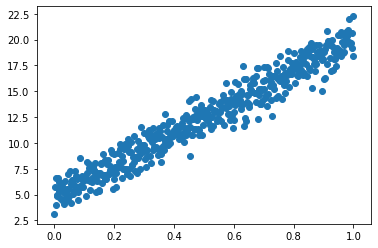

In [41]:
n = 500
x,y = data_gen(n)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

### Fitting the Curve

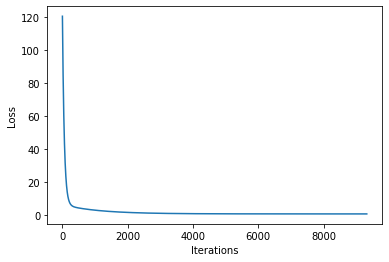

In [42]:
t0,t = fit(x_train,y_train,alpha = 0.01,epsilon = 0.000001)

### Training error work

In [43]:
sq_error(t0,t,x_train,y_train)

0.7907747157983062

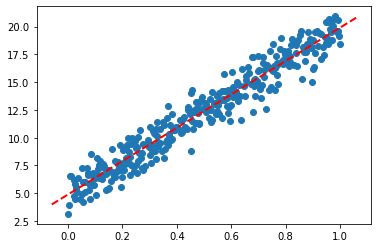

In [44]:
plt.scatter(x_train,y_train)
line(t,t0)
plt.show()

### Testing Result

In [45]:
result=predict(t0,t,x_test)

In [46]:
sq_error(t0,t,x_test,y_test)

0.3136280963366875

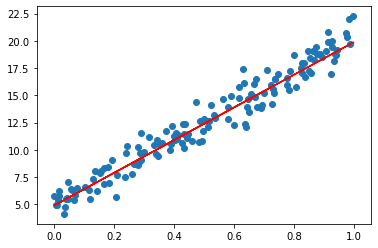

In [47]:
plt.scatter(x_test,y_test)
plt.plot(x_test,result,'r')
plt.show()